# Summarry

I conducted a data analysis project focused on dog ratings on Twitter. I worked with three different data sources, including data obtained via the Twitter API (gotten from udacity), and used Python and the pandas library to carry out data wrangling tasks, including merging prediction columns, changing data types, removing retweets, and addressing inaccurate ratings. I also cleansed the data to improve its accuracy and readability, and capitalized dog breed names that were not truly dogs. Additionally, I used the matplotlib and seaborn libraries to visualize the data, gaining insights such as the most liked and retweeted dog breeds based on favourite and retweet counts, the distribution of dog breeds, the distribution of tweet sources, and the month with the highest frequency of tweets. My goal was to improve the accuracy and usefulness of the data for further analysis, and I believe that my work achieved this goal while also providing valuable insights into dog ratings on Twitter

You can view my code below

# Project: WeRateDogs Data Wrangling and Analysis

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
%matplotlib inline

c:\users\emmyvera\appdata\local\programs\python\python37\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## Data Gathering

###  Reading the Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Read the csv file and display the first 3 rows
df1 = pd.read_csv("twitter-archive-enhanced.csv")
df1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Obtained the file from the url using the request library.
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response

<Response [200]>

In [4]:
# Saving the file to the current directory i am working on
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
#Reading the tsv file downloaded
df2 = pd.read_csv('image-predictions.tsv',sep = '\t')
df2.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Data 3 - Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Querying Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Querying Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Saving each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
import json
tweets_list = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        tweets_list.append(data)
df3 = pd.DataFrame(tweets_list, columns=['id', 'retweet_count', 'favorite_count'])

In [7]:
df3.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


## Assessing the Data

### Visually Assessing the Data

In [8]:
df1.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2263,667544320556335104,NaN,NaN,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,None,None,None
1616,685198997565345792,NaN,NaN,2016-01-07 20:39:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. That is his time machine. He's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685198997...,11,10,Alfie,None,None,None,None
663,790946055508652032,NaN,NaN,2016-10-25 16:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Betty. She's assisting with the dishes...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790946055...,12,10,Betty,None,None,None,puppo
1516,690959652130045952,NaN,NaN,2016-01-23 18:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This golden is happy to refute the soft mouth ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690959652...,11,10,None,None,None,None,None
1047,743510151680958465,NaN,NaN,2016-06-16 18:26:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Beya. She doesn't want to swim, so she...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743510151...,13,10,Beya,None,None,None,None
1044,743609206067040256,NaN,NaN,2016-06-17 01:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stark. He just had his first ice cream co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743609206...,10,10,Stark,None,None,None,None
219,850145622816686080,NaN,NaN,2017-04-07 00:38:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Riley. He's making new friends. Jubila...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850145622...,11,10,Riley,None,None,None,None
785,775085132600442880,NaN,NaN,2016-09-11 21:34:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He would like a hug. 13/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775085132...,13,10,Tucker,None,None,None,None
1382,700864154249383937,NaN,NaN,2016-02-20 02:06:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Pupper is a present to world. Here is a bow f...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/700864154...,12,10,a,None,None,pupper,None
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,11,10,None,None,floofer,None,None


In [9]:
df2.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
88,667530908589760512,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,1,golden_retriever,0.633037,True,kuvasz,0.146391,True,Labrador_retriever,0.046184,True
835,694183373896572928,https://pbs.twimg.com/media/CaI8Fn0WAAIrFJN.jpg,1,teddy,0.441499,False,Pekinese,0.080870,True,Shih-Tzu,0.072099,True
962,705970349788291072,https://pbs.twimg.com/media/CcwcSS9WwAALE4f.jpg,1,golden_retriever,0.776346,True,Labrador_retriever,0.112413,True,chow,0.036953,True
1750,823939628516474880,https://pbs.twimg.com/media/C284uD8WgAEmMVn.jpg,1,schipperke,0.234076,True,curly-coated_retriever,0.193093,True,Labrador_retriever,0.095197,True
1405,769940425801170949,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
721,685973236358713344,https://pbs.twimg.com/media/CYURBGoWYAAKey3.jpg,1,Siberian_husky,0.450678,True,Eskimo_dog,0.430275,True,malamute,0.118590,True
1931,859074603037188101,https://pbs.twimg.com/media/C-wLyufW0AA546I.jpg,1,revolver,0.190292,False,projectile,0.149064,False,fountain,0.066047,False
1386,766069199026450432,https://pbs.twimg.com/media/CqGf3xaXYAEh3ak.jpg,1,redbone,0.484855,True,beagle,0.437527,True,basset,0.010585,True
1346,759197388317847553,https://pbs.twimg.com/media/Cok1_sjXgAU3xpp.jpg,1,kuvasz,0.511341,True,golden_retriever,0.076899,True,white_wolf,0.063269,False
715,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web_site,0.923987,False,oscilloscope,0.009712,False,hand-held_computer,0.008769,False


In [10]:
df3.sample(15)

,id,retweet_count,favorite_count
2178,669000397445533696,6965,22118
205,852672615818899456,2388,15939
802,772152991789019136,1300,4181
1201,716285507865542656,1225,3041
852,765222098633691136,3914,12902
397,825026590719483904,1483,7020
258,843235543001513987,6852,23315
1600,685973236358713344,611,2326
1920,674255168825880576,619,1581
2142,669942763794931712,183,536


## Assessing the Data

### For `df1`

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
df1.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Checking to see if some of the Ratings extracted are correct

In [13]:
# Checking the denominators
df1["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
#Taking five random samples
df1["rating_denominator"].value_counts().sample(5)

16    1
2     1
11    3
0     1
90    1
Name: rating_denominator, dtype: int64

In [15]:
def confirm_rating_denominators(x):
    """
    To verify ratings, this function examines the tweet's content and index.
    
    Return: None, rather it print out row and the text in the text column of the data frame
    """  
    d = df1["rating_denominator"]
    for i in d:
        print(df1.loc[df1.rating_denominator == x, 'text'])
        return

In [16]:
# Calling the function to check some information
confirm_rating_denominators(x = 9)
# Checking another random sample
confirm_rating_denominators(x = 7)
# confirming rating for denominator 2
confirm_rating_denominators(x = 12)
# confirming rating for denominator 11
confirm_rating_denominators(x = 11)
# confirming rating for denominator 70
confirm_rating_denominators(x = 70)


Series([], Name: text, dtype: object)
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
Series([], Name: text, dtype: object)
784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
433    The floofs have been released I repeat the flo...
Name: text, dtype: object


In [17]:
# Printing the texts in full
print(df1['text'][516]) 
print(df1['text'][784]) 
print(df1['text'][1068])
print(df1['text'][1662])
print(df1['text'][433])

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd


Some of the denominators contains ratings that are not correct as shown above

##### Checking for the numerators

In [18]:
df1["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
#Taking five random samples
df1["rating_numerator"].value_counts().sample(5)

10     461
7       55
960      1
13     351
8      102
Name: rating_numerator, dtype: int64

In [20]:
def confirm_rating_numerators(x):
    """
    To ensure ratings, this function verifies the index and the tweet's text.
    
    Return: None, rather it print out row and the text in the text column of the data frame 
    """  
    n = df1["rating_numerator"]
    for i in n:
        print(df1.loc[df1.rating_numerator == x, 'text'])
        return

In [21]:
# checking some of the ratings to confirm their numerators
confirm_rating_numerators(x = 1)
confirm_rating_numerators(x = 26)
confirm_rating_numerators(x=50)


605     RT @dog_rates: Not familiar with this breed. N...
1446    After reading the comments I may have overesti...
1869    What kind of person sends in a picture without...
1940    The millennials have spoken and we've decided ...
2038    After 22 minutes of careful deliberation this ...
2091    Flamboyant pup here. Probably poisonous. Won't...
2261    Never seen dog like this. Breathes heavy. Tilt...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2338    Not familiar with this breed. No tail (weird)....
Name: text, dtype: object
1712    Here we have uncovered an entire battalion of ...
Name: text, dtype: object
1202    This is Bluebert. He just saw that both #Final...
Name: text, dtype: object


In [22]:
# Printing the texts in full to confirm the ratings
print(df1['text'][2335]) 
print(df1['text'][1712]) 
print(df1['text'][1202]) 

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq


Some of the numerators contains ratings that are not correct as shown above

In [23]:
# Checking the names
df1['name'].value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Toby          7
Buddy         7
an            7
Bailey        7
Leo           6
Stanley       6
Jack          6
Dave          6
Bella         6
Oscar         6
Milo          6
Scout         6
Rusty         6
Koda          6
Jax           6
Oakley        5
           ... 
Zuzu          1
Bodie         1
Ralphé        1
JD            1
Ember         1
Rilo          1
Beckham       1
Julio         1
Rumble        1
Holly         1
Birf          1
Philippe      1
Rambo         1
Dunkin        1
Spark         1
Rover         1
Glenn         1
Jerome        1
life          1
Brady         1
Brandi        1
Toffee        1
Ito           1
Alf           1
Pavlov        1
Nida          1
Timber        1
Buddah        1
Rorie         1
Andy          1
Name: name, Length: 957,

In [24]:
# Checking for Duplicates
df1.tweet_id.duplicated().value_counts(), df1.shape

(False    2356
 Name: tweet_id, dtype: int64, (2356, 17))

## OBSERVATIONS
* The `timestamp` column is a s`tring` type and should be in `datetime` data type
* The Dog stages should be in one column
* The source of the tweet is ambiguous and not easy to understand
* Numerator and Denominator rating values are inproperly 
* Only original tweets with pictures are required but some of the tweets are retweets
* Some Columns will be dropped as they have alot of missing values

### For `df2` (image predictions)

In [25]:
df2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1601,799774291445383169,https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg,1,chow,0.316565,True,golden_retriever,0.241929,True,Pomeranian,0.157524,True
991,708026248782585858,https://pbs.twimg.com/ext_tw_video_thumb/70802...,1,malinois,0.786468,True,Chesapeake_Bay_retriever,0.068979,True,Siamese_cat,0.029304,False
132,668466899341221888,https://pbs.twimg.com/media/CUbfGbbWoAApZth.jpg,1,shopping_basket,0.398361,False,hamper,0.363222,False,bassinet,0.084173,False
1955,864279568663928832,https://pbs.twimg.com/media/C_6JrWZVwAAHhCD.jpg,1,bull_mastiff,0.668613,True,French_bulldog,0.180562,True,Staffordshire_bullterrier,0.052237,True
1121,726887082820554753,https://pbs.twimg.com/media/ChZr8SdWIAAVQKt.jpg,1,soft-coated_wheaten_terrier,0.515919,True,Irish_terrier,0.162655,True,Chesapeake_Bay_retriever,0.125182,True
660,682406705142087680,https://pbs.twimg.com/media/CXhlRmRUMAIYoFO.jpg,1,wombat,0.709344,False,koala,0.169758,False,beaver,0.079433,False
575,678643457146150913,https://pbs.twimg.com/media/CWsGnyMVEAAM1Y1.jpg,1,Labrador_retriever,0.338757,True,flat-coated_retriever,0.304470,True,chest,0.093392,False
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
877,698342080612007937,https://pbs.twimg.com/ext_tw_video_thumb/69834...,1,boxer,0.883048,True,Saint_Bernard,0.030579,True,Staffordshire_bullterrier,0.012994,True
574,678446151570427904,https://pbs.twimg.com/media/CWpTLOYWsAEDhcU.jpg,1,Staffordshire_bullterrier,0.284492,True,Rottweiler,0.189434,True,American_Staffordshire_terrier,0.189430,True


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
# Checking common dogs for Prediction 1
df2.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
beagle                        18
Maltese_dog                   18
teddy                         18
Eskimo_dog                    18
Shetland_sheepdog             18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [28]:
# Checking common dogs for prediction 2
df2.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
miniature_pinscher                 20
toy_terrier                        20
Samoyed                            20
malinois                           20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [29]:
#checking common dogs for prediction 3
df2.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

In [30]:
df2.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [31]:
# Checking for Duplicates
df2.jpg_url.duplicated().sum(), df2.tweet_id.duplicated().sum()

(66, 0)

### OBSERVATIONS
* Duplicated jpg urls 
* Some dog names need to be capitalized and some dog names are not real names
* `prediction` columns can be merged into one standard prediction Rating

### For `df3` Twitter API dataframe

In [32]:
df3.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [34]:
df3.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


# Cleaning the Data

#### Making Copies of the DataFrames using `.copy()` as checkpoint

In [35]:
df1C = df1.copy()
df2C = df2.copy()
df3C = df3.copy()

## OBSERVATIONS AND THEIR CATEGORIES

### QUALITY CONCERNS
* Merge data prediction columns to create a single column with dog breed and confidence ratings for predictions
* The timestamp column should be changed to a `datetime` data-type.
* Retweets will be deleted, we need original tweets with images.
* The provided source data is challenging to read and has to be cleansed
* Inaccurate ratings in the denominators and numerators
* Since several of the columns' values are lacking, some of them will be removed.
* Use to fill in the blanks in the expanded urls column.
`dropna`
* Make all necessary corrections to the dataset's incorrect data types, including switching the source and dog stages data  types to the category data type for later analysis.
* Dog breeds that aren't truly dogs should have their names capitalized.



### TIDINESS CONCERNS

* The `dog_stages`  column for `df1` `twitter_archive_enhanced.csv` 
* The information about the tweets is dispersed across three separate datasets and can be fit into a single column in csv.

### Data Cleaning Process

* Define
* Code
* Test

### Quality Issue 1

Define : Merge data prediction columns to create a single column with dog breed and confidence ratings for predictions

Code

In [36]:
df2C.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1329,757596066325864448,https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg,1,doormat,0.845256,False,wallet,0.095718,False,wool,0.026072,False
346,672466075045466113,https://pbs.twimg.com/media/CVUUU_EWoAAxABV.jpg,1,cocker_spaniel,0.150424,True,toy_poodle,0.088605,True,Welsh_springer_spaniel,0.072014,True
1449,776201521193218049,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True
403,673700254269775872,https://pbs.twimg.com/media/CVl2ydUWsAA1jD6.jpg,1,water_bottle,0.614536,False,ashcan,0.050911,False,bucket,0.037432,False
350,672488522314567680,https://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg,1,Doberman,0.605358,True,Rottweiler,0.108382,True,Appenzeller,0.077798,True


In [37]:
# Created an empty list for breed and confidence_rating
breed = []
confidence_rating = []

# creating a function to check the confidence rating is it's True

def breed_confidence(df2C):
    """
    This function checks if the dog is true based on the predictions: p1 is the most accurate
    followed by p2  and then p3. The function also appends the confidence rating for each known dog.
    
    """
    if df2C.p1_dog == True:
        breed.append(df2C.p1)
        confidence_rating.append(df2C.p1_conf)
    elif df2C.p2_dog == True:
        breed.append(df2C.p2)
        confidence_rating.append(df2C.p2_conf)
    elif df2C.p3_dog == True:
        breed.append(df2C.p3)
        confidence_rating.append(df2C.p3_conf)
    else:
        breed.append("unknown")
        confidence_rating.append(0)

In [38]:
# Applying the Function
df2C.apply(breed_confidence, axis = 1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
2045    None
2046    None
2047    None
2048    None
2049    None
2050    None
2051    None
2052    None
2053    None
2054    None
2055    None
2056    None
2057    None
2058    None
2059    None
2060    None
2061    None
2062    None
2063    None
2064    None
2065    None
2066    None
2067    None
2068    None
2069    None
2070    None
2071    None
2072    None
2073    None
2074    None
Length: 2075, dtype: object

In [39]:
# Add the breed and confidence_level column to image_prediction column
df2C['dog_breed'] = breed
df2C['confidence_rating'] = confidence_rating

In [40]:
# dropping columns that we do not need again
df2C = df2C.drop([ 'p1_conf',
                    'p2_conf',
                    'p3_conf'],axis=1)

Test

In [41]:
df2C.head()

,tweet_id,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,dog_breed,confidence_rating
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,True,collie,True,Shetland_sheepdog,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,True,malinois,True,bloodhound,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,True,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,True,Rottweiler,True,Doberman,True,miniature_pinscher,0.560311


In [42]:
df2C.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,dog_breed,confidence_rating
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,False,Chihuahua,True,Brabancon_griffon,True,Chihuahua,0.187155
1405,769940425801170949,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,True,Chihuahua,True,Staffordshire_bullterrier,True,miniature_pinscher,0.796313
1716,819006400881917954,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,False,palace,False,umbrella,False,unknown,0.000000
1829,836001077879255040,https://pbs.twimg.com/media/C5oSiskU0AE8sJ_.jpg,4,Samoyed,True,white_wolf,False,malamute,True,Samoyed,0.963558
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,True,Pekinese,True,papillon,True,Chihuahua,0.323581
323,671874878652489728,https://pbs.twimg.com/media/CVL6op1WEAAUFE7.jpg,1,china_cabinet,False,entertainment_center,False,bookcase,False,unknown,0.000000
15,666099513787052032,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,1,Lhasa,True,Shih-Tzu,True,Dandie_Dinmont,True,Lhasa,0.582330


### Quality Issue 2

Define : The timestamp column should be changed to a datetime data-type.

Code

In [43]:
df1C.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [44]:
# Converting the timestamp column in the df1C frame to a datetime object
df1C["timestamp"] = pd.to_datetime(df1C["timestamp"])

In [45]:
type(df1C['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [46]:
#Year the tweet was sent
df1C["tweet_year"] = df1C["timestamp"].dt.year
# Month of tweet
df1C["timestamp"].dt.month
months = {1:'January', 2:'Febuary', 3:'March',4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
df1C['month_of_tweet'] = df1C["timestamp"].dt.month.apply(lambda x : months[x])
# days tweets were sent
df1C['day_of_tweet'] = df1C['timestamp'].dt.day_name()
#hour of the tweet sent in a 24 hour system
df1C["hour_of_tweet"] = df1C["timestamp"].dt.hour

Test

In [47]:
df1C.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,None,None,None,None,2017,Aug,Tuesday,16
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,None,None,None,None,2017,Aug,Tuesday,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,10,Archie,None,None,None,None,2017,July,Monday,0


In [48]:
df1C.tweet_year.value_counts()

2016    1183
2015     690
2017     483
Name: tweet_year, dtype: int64

### Quality Issue 3

Define : Retweets will be deleted, we need original tweets with images.

Code

In [49]:
# Removing rows that have non-empty retweeted_status_id and retweeted_status_user_id

# Removing retweets
df1C = df1C[df1C.retweeted_status_id.isnull()]

# Removing replies
df1C = df1C[df1C.in_reply_to_status_id.isnull()]

Test

In [50]:
df1C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
tweet_year                    20

### Quality Issue 4

Define : The provided source data is challenging to read and has to be cleansed

Code

In [51]:
df1['source'].head(3)

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [52]:
df1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [53]:
df1['source'] = df1['source'].replace ({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for i-phone',
                                       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - make a scene',
                                       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client',
                                       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'Tweet Deck'})

Test

In [54]:
# Add cleaned source column to the copied dataFrame
df1C['tweet_source'] = df1['source']

In [55]:
df1C['tweet_source'].value_counts()

Twitter for i-phone    1964
Vine - make a scene      91
Twitter Web Client       31
Tweet Deck               11
Name: tweet_source, dtype: int64

## Quality Issue 5

Define: Inaccurate ratings in the denominators and numerators

Code

In [56]:
df1C.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [57]:
# rating_numerator 75, 26, 27, 0
df1C.query('rating_numerator == 75 or rating_numerator == 26 or rating_numerator == 27 or rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,...,None,None,None,None,None,2017,Feb,Friday,15,Twitter for i-phone
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,...,Logan,None,None,None,None,2016,Oct,Thursday,23,Twitter for i-phone
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,...,Sophie,None,None,pupper,None,2016,Sept,Tuesday,0,Twitter for i-phone
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,...,None,None,None,None,None,2015,Dec,Friday,21,Twitter for i-phone


In [58]:
print(df1C['text'][315]) 
print(df1C['text'][695])
print(df1C['text'][763]) 
print(df1C['text'][1712]) 

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [59]:
# Correcting the ratings
# tweet_id: 786709082849828864, rating _numberator should be 9.75 according to the text
df1C.loc[df1C.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75
# tweet_id: 680494726643068929, rating _numberator should be 11.26 according to the text
df1C.loc[df1C.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26
# tweet_id: 778027034220126208, rating _numberator should be 11.27 according to the text
df1C.loc[df1C.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27

In [60]:
# rating_denominator 75, 26, 27, 0
df1C.query('rating_denominator == 7 or rating_denominator == 11 or rating_denominator == 2 or rating_denominator == 70')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,...,None,None,None,None,None,2017,Jan,Sunday,17,Twitter for i-phone
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",...,Sam,None,None,None,None,2016,Dec,Monday,23,Twitter for i-phone
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,...,None,None,None,None,None,2016,June,Wednesday,2,Twitter for i-phone
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,...,Darrel,None,None,None,None,2016,Jan,Friday,16,Twitter for i-phone
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,...,an,None,None,None,None,2015,Nov,Monday,16,Twitter for i-phone


In [61]:
print(df1C['text'][433]) 
print(df1C['text'][516])
print(df1C['text'][1068]) 
print(df1C['text'][1662]) 
print(df1C['text'][2335]) 

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [62]:
# Correcting the ratings
# tweet_id: 810984652412424192, rating _numberator should be NAN according to the text
df1C.loc[df1C.tweet_id == 810984652412424192, 'rating_denominator'] = 'NAN'
# tweet_id: 740373189193256964, rating _numberator should be 10 according to the text
df1C.loc[df1C.tweet_id == 740373189193256964, 'rating_denominator'] = 10
# tweet_id: 682962037429899265, rating _numberator should be 10 according to the text
df1C.loc[df1C.tweet_id == 682962037429899265, 'rating_denominator'] = 10
# tweet_id: 666287406224695296, rating _numberator should be 10 according to the text
df1C.loc[df1C.tweet_id == 666287406224695296, 'rating_denominator'] = 10

Test

In [63]:
# rating_denominator 75, 26, 27, 0
df1C.query('rating_denominator == 7 or rating_denominator == 11 or rating_denominator == 2 or rating_denominator == 70')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,...,None,None,None,None,None,2017,Jan,Sunday,17,Twitter for i-phone


In [64]:
# rating_numerator 75, 26, 27, 0
df1C.query('rating_numerator == 75 or rating_numerator == 26 or rating_numerator == 27 or rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,...,None,None,None,None,None,2017,Feb,Friday,15,Twitter for i-phone


### Quality Issue 7

Define : Some of the dog_breeds are not actually dogs and they should be capitalized

Code

In [65]:
df2C.head()

,tweet_id,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,dog_breed,confidence_rating
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,True,collie,True,Shetland_sheepdog,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,True,malinois,True,bloodhound,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,True,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,True,Rottweiler,True,Doberman,True,miniature_pinscher,0.560311


In [66]:
# Filtering posts that are not dogs
df2C.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id

#Creating a list where all the id's that are not dogs will be dropped from
drop_list = df2C.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id


In [67]:
df3C.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [68]:
df3C.rename(columns = {'id' : 'tweet_id'}, inplace = True)

In [69]:
# I am now going to drop all the columns with the ID's in the drop list in all dataframes
df1C = df1C[~df1C.tweet_id.isin(drop_list)]
df2C = df2C[~df2C.tweet_id.isin(drop_list)]
df3C = df3C[~df3C.tweet_id.isin(drop_list)]

In [70]:
# dropping columns that we do not need again
df2C = df2C.drop(['p1','p1_dog',
                             'p2','p2_dog',
                             'p3','p3_dog'],axis=1)

In [71]:
# Capitalizing Dog Breed Names
df2C['dog_breed'] = df2C['dog_breed'].str.capitalize()

Test

In [72]:
df2C.head()

,tweet_id,jpg_url,img_num,dog_breed,confidence_rating
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311


In [73]:
# Checking the new shape of the data
df1C.shape, df2C.shape, df3C.shape

((1792, 22), (1751, 5), (2031, 3))

## Quality Issue 8

Define: Some columns will be dropped as they have alot of missing values

Code

In [74]:
df1C.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Tilly,None,None,None,None,2017,Aug,Tuesday,0,Twitter for i-phone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Archie,None,None,None,None,2017,July,Monday,0,Twitter for i-phone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Darla,None,None,None,None,2017,July,Sunday,15,Twitter for i-phone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,Franklin,None,None,None,None,2017,July,Saturday,16,Twitter for i-phone
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,None,None,None,None,None,2017,July,Saturday,0,Twitter for i-phone


In [75]:
df1C.drop(['in_reply_to_status_id', 
                  'in_reply_to_user_id',
                  'source',
                  'retweeted_status_id',
                  'retweeted_status_user_id',
                  'retweeted_status_timestamp'], axis = 1, inplace=True)

Test

In [76]:
df1C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 1 to 2355
Data columns (total 16 columns):
tweet_id              1792 non-null int64
timestamp             1792 non-null datetime64[ns]
text                  1792 non-null object
expanded_urls         1789 non-null object
rating_numerator      1792 non-null float64
rating_denominator    1792 non-null object
name                  1792 non-null object
doggo                 1792 non-null object
floofer               1792 non-null object
pupper                1792 non-null object
puppo                 1792 non-null object
tweet_year            1792 non-null int64
month_of_tweet        1792 non-null object
day_of_tweet          1792 non-null object
hour_of_tweet         1792 non-null int64
tweet_source          1792 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(11)
memory usage: 238.0+ KB


In [77]:
df1C.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,2017,Aug,Tuesday,0,Twitter for i-phone
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,2017,July,Monday,0,Twitter for i-phone
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,2017,July,Sunday,15,Twitter for i-phone
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,2017,July,Saturday,16,Twitter for i-phone
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,None,None,None,None,2017,July,Saturday,0,Twitter for i-phone


### Quality Issue 9

Define: Remove missing values in expanded_urls column by using `.dropna`

Code

In [78]:
df1C.dropna(subset=['expanded_urls'], inplace=True)

In [79]:
# replacing none with np.nan for easy working with null values
df1C.replace('None', np.NaN, inplace=True)

Test

In [80]:
df1C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789 entries, 1 to 2355
Data columns (total 16 columns):
tweet_id              1789 non-null int64
timestamp             1789 non-null datetime64[ns]
text                  1789 non-null object
expanded_urls         1789 non-null object
rating_numerator      1789 non-null float64
rating_denominator    1789 non-null object
name                  1313 non-null object
doggo                 73 non-null object
floofer               10 non-null object
pupper                193 non-null object
puppo                 23 non-null object
tweet_year            1789 non-null int64
month_of_tweet        1789 non-null object
day_of_tweet          1789 non-null object
hour_of_tweet         1789 non-null int64
tweet_source          1789 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(11)
memory usage: 237.6+ KB


In [81]:
df1C.expanded_urls.isnull().sum()

0

### Tidiness Issue 1

Define: The information about the tweets is dispersed across three separate datasets and can be fit into a single column in csv.

Code

In [82]:
df1C.shape

(1789, 16)

In [83]:
df1C[['tweet_id','doggo','floofer','pupper','puppo']].sample(5)

,tweet_id,doggo,floofer,pupper,puppo
1581,687124485711986689,NaN,NaN,NaN,NaN
15,889278841981685760,NaN,NaN,NaN,NaN
554,803773340896923648,NaN,NaN,NaN,puppo
986,749064354620928000,NaN,NaN,NaN,NaN
1954,673656262056419329,NaN,NaN,pupper,NaN


In [84]:
# using the pd.melt() method to convert the columns into rows
df_dog_stage= pd.melt(df1C, id_vars='tweet_id', value_vars=['doggo','floofer','pupper','puppo'], value_name='dog_stage')
df_dog_stage.head()

,tweet_id,variable,dog_stage
0,892177421306343426,doggo,NaN
1,891815181378084864,doggo,NaN
2,891689557279858688,doggo,NaN
3,891327558926688256,doggo,NaN
4,891087950875897856,doggo,NaN


In [85]:
# dropping the variable column
df_dog_stage.drop('variable', axis=1, inplace=True)

In [86]:
# Dropping Duplicates
df_dog_stage.drop_duplicates(inplace=True)

In [87]:
# combine stages for tweets with more than one dog stage
has_dog_stage = df_dog_stage[df_dog_stage.dog_stage.notna()]
combined_stages = has_dog_stage.groupby('tweet_id').transform(lambda x: ', '.join(x))

In [88]:
# replacing these combined stages in the dog_stage_df
df_dog_stage.loc[combined_stages.index, 'dog_stage'] = combined_stages.values

In [89]:
# dropping duplicates
df_dog_stage.sort_values(by='dog_stage', inplace=True)
df_dog_stage.drop_duplicates(subset='tweet_id', inplace=True)

In [90]:
df1C.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

In [91]:
# merge the dog_stage dataframe and the copied dataframe
df1C = pd.merge(df1C, df_dog_stage, on=['tweet_id'])

Test

In [92]:
df1C.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source,dog_stage
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,2017,Aug,Tuesday,0,Twitter for i-phone,NaN
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,2017,July,Monday,0,Twitter for i-phone,NaN


### Tidiness Issue 2

Define: The `dog_stages` column for `df1` `twitter_archive_enhanced.csv`

Code

In [93]:
# Merge all data Frame based on ID
twitter_project_clean = pd.merge(df1C, df2C,
                            on = ['tweet_id'], how = 'left')

In [94]:
# Combining the three dataframes together
twitter_project_clean = pd.merge(twitter_project_clean, df3C,
                            on = ['tweet_id'], how = 'left')

In [95]:
# Dropping rows that do not have image url
twitter_project_clean = (twitter_project_clean[twitter_project_clean.jpg_url.notnull()])

In [96]:
twitter_project_clean.jpg_url.isnull().sum()

0

Test

In [97]:
twitter_project_clean.head(3)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source,dog_stage,jpg_url,img_num,dog_breed,confidence_rating,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,2017,Aug,Tuesday,0,Twitter for i-phone,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,2017,July,Monday,0,Twitter for i-phone,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,4328,25461
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,2017,July,Sunday,15,Twitter for i-phone,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,8964,42908


## Storing Data
Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_cleaned.csv".

In [98]:
# Saving combined cleaned dataframe to master datframe
twitter_project_clean.to_csv('twitter_archive_cleaned.csv')

In [99]:
# load data to a dataframe
df = pd.read_csv('twitter_archive_cleaned.csv')
df.drop("Unnamed: 0", axis=1, inplace=True)

In [100]:
df.sample(12)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source,dog_stage,jpg_url,img_num,dog_breed,confidence_rating,retweet_count,favorite_count
929,704054845121142784,2016-02-28 21:25:30,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60.0,50,a,2016,Feb,Sunday,21,Twitter for i-phone,NaN,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1.0,Great_pyrenees,0.667939,1028,3201
601,756651752796094464,2016-07-23 00:46:50,This is Gert. He just wants you to be happy. 1...,https://twitter.com/dog_rates/status/756651752...,11.0,10,Gert,2016,July,Saturday,0,Twitter for i-phone,NaN,https://pbs.twimg.com/media/CoAqwPTW8AAiJlz.jpg,1.0,Pembroke,0.294808,1511,5612
283,821522889702862852,2017-01-18 01:01:34,This is Harlso. He has a really good idea but ...,https://twitter.com/dog_rates/status/821522889...,13.0,10,Harlso,2017,Jan,Wednesday,1,Twitter for i-phone,NaN,https://pbs.twimg.com/media/C2aitIUXAAAG-Wi.jpg,1.0,Doberman,0.763539,2030,8871
1435,671528761649688577,2015-12-01 03:18:27,Meet Jax. He's in the middle of a serious conv...,https://twitter.com/dog_rates/status/671528761...,10.0,10,Jax,2015,Dec,Tuesday,3,Twitter for i-phone,NaN,https://pbs.twimg.com/media/CVG_2I-WIAASKSS.jpg,1.0,Doberman,0.782626,280,896
1004,696488710901260288,2016-02-08 00:20:23,12/10 revolutionary af https://t.co/zKzq4nIY86,https://twitter.com/dog_rates/status/696488710...,12.0,10,NaN,2016,Feb,Monday,0,Twitter for i-phone,NaN,https://pbs.twimg.com/media/CapsyfkWcAQ41uC.jpg,1.0,Briard,0.369063,1166,2788
1201,679854723806179328,2015-12-24 02:42:51,This is Bruce. He's a rare pup. Covered in Fro...,https://twitter.com/dog_rates/status/679854723...,7.0,10,Bruce,2015,Dec,Thursday,2,Twitter for i-phone,NaN,https://pbs.twimg.com/media/CW9UQ7oWkAAErmU.jpg,1.0,Chow,0.002307,1402,3143
1422,672095186491711488,2015-12-02 16:49:14,This is Tuco. That's the toast that killed his...,https://twitter.com/dog_rates/status/672095186...,9.0,10,Tuco,2015,Dec,Wednesday,16,Twitter for i-phone,NaN,https://pbs.twimg.com/media/CVPDAR9XIAAm8QB.jpg,1.0,Pug,0.794087,395,1063
182,841314665196081154,2017-03-13 15:47:01,This is Max. There's no way in h*ck you're tak...,https://twitter.com/dog_rates/status/841314665...,13.0,10,Max,2017,Mar,Monday,15,Twitter Web Client,NaN,https://pbs.twimg.com/ext_tw_video_thumb/84131...,1.0,Afghan_hound,0.903712,5312,17305
676,746056683365994496,2016-06-23 19:05:49,This is Arlen and Thumpelina. They are best pa...,https://twitter.com/dog_rates/status/746056683...,11.0,10,Arlen,2016,June,Thursday,19,Twitter for i-phone,NaN,https://pbs.twimg.com/media/ClqGl7fXIAA8nDe.jpg,1.0,Shetland_sheepdog,0.433320,931,3904
442,788412144018661376,2016-10-18 16:11:17,This is Dexter. He breaks hearts for a living....,https://twitter.com/dog_rates/status/788412144...,11.0,10,Dexter,2016,Oct,Tuesday,16,Twitter for i-phone,NaN,https://pbs.twimg.com/media/CvEAqQoWgAADj5K.jpg,1.0,Golden_retriever,0.805238,5990,16060


## Analyzing and Visualizing Data

### Insights

* Most Liked and retweeted dog breeds based on favourite and retweet counts
* Distribution for dog breeds
* Checking the distribution for the tweet source
* Month with the highest frequency of tweets

In [101]:
# Setting Figsize for better viewing
sns.set(rc={'figure.figsize':(14,8)})

### Most Liked and retweeted dog breeds based on favourite and retweet counts

In [102]:
# Checking the dog breed preference based on likes
dog_breed_likes = df.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending=False).head(6)
dog_breed_likes

dog_breed
Golden_retriever      1943782
Labrador_retriever    1265355
Pembroke              1038797
Chihuahua              743689
Samoyed                583906
French_bulldog         570921
Name: favorite_count, dtype: int64

In [103]:
# Checking The dog breed preference based on retweet count
dog_breed_retweet = df.groupby('dog_breed')['retweet_count'].sum().sort_values(ascending=False).head(6)
dog_breed_retweet

dog_breed
Golden_retriever      586657
Labrador_retriever    405404
Pembroke              291771
Chihuahua             250722
Samoyed               203446
French_bulldog        156230
Name: retweet_count, dtype: int64

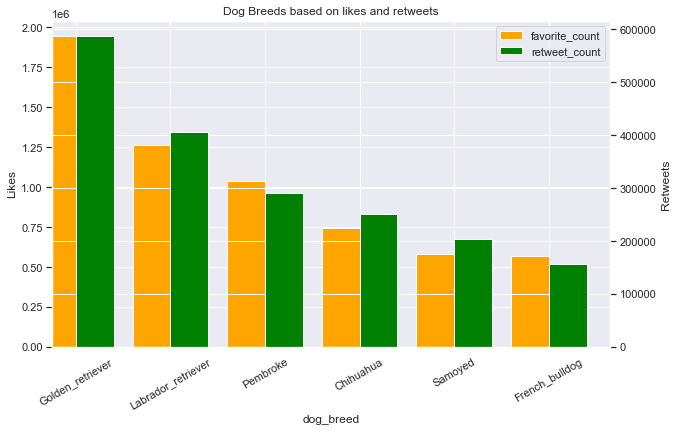

In [104]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


dog_breed_likes.plot(figsize = (10,6), kind='bar', color='orange', ax=ax1, width=0.4, position=1, 
             title='Dog Breeds based on likes and retweets')
dog_breed_retweet.plot(figsize = (10,6), kind='bar', color='green', ax=ax2, width=0.4, position=0)

ax1.set_ylabel('Likes')
ax2.set_ylabel('Retweets')
ax1.set_xticklabels(dog_breed_likes.index, rotation=30)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=1)
#save pic
plt.savefig('popular_dogs.png', dpi=100)

plt.show();

### Distribution for dog breeds

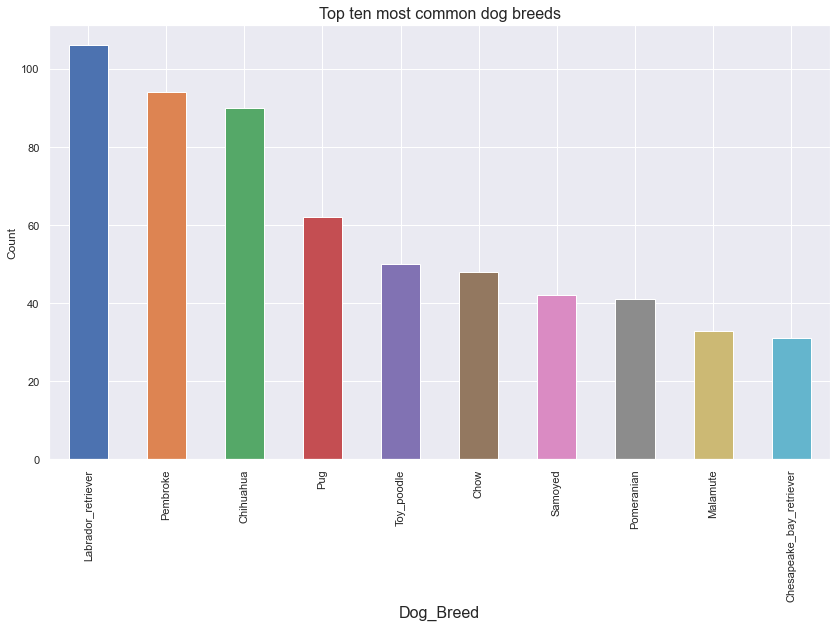

In [105]:
df.dog_breed.value_counts().head(11)[1:].plot(kind = 'bar')
plt.xlabel('Dog_Breed', fontsize=16)
plt.title('Top ten most common dog breeds', fontsize=16) 
plt.ylabel('Count');

### Checking the distribution for the tweet source

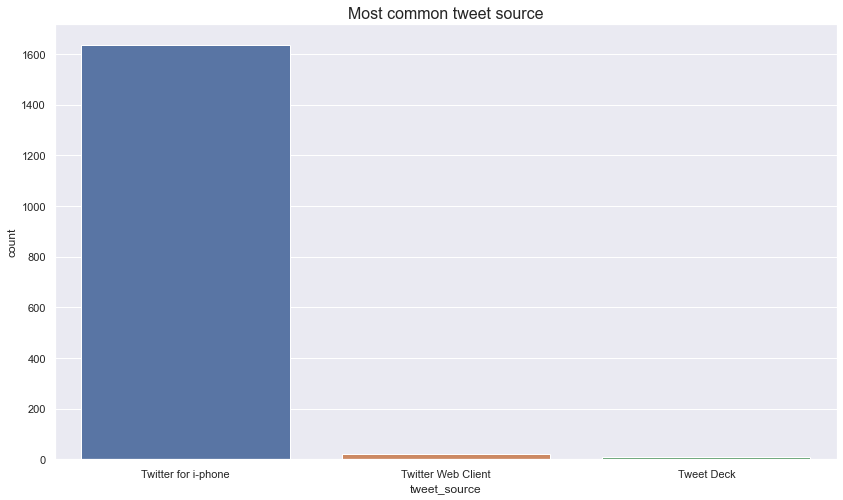

In [106]:
# Checking the month with the highest frequency of tweets
ax1 = sns.countplot(x='tweet_source', data=df)
plt.title("Most common tweet source", fontsize=16);

### Month with the highest frequency of tweets

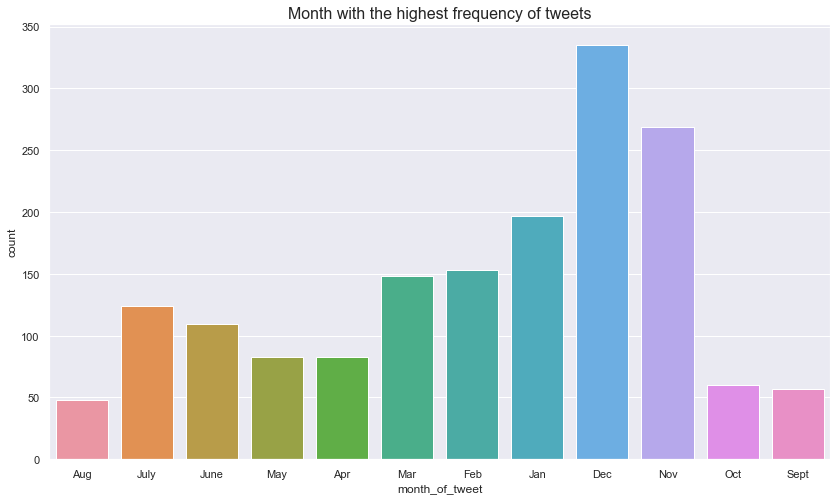

In [107]:
# Checking the month with the highest frequency of tweets
ax1 = sns.countplot(x='month_of_tweet', data=df)
plt.title("Month with the highest frequency of tweets", fontsize= 16);